Streaming output truncated to the last 5000 lines.
Error processing image at path 'None': 'NoneType' object has no attribute 'read'
Error processing image at path 'None': 'NoneType' object has no attribute 'read'
Error processing image at path 'None': 'NoneType' object has no attribute 'read'
Error processing image at path 'None': 'NoneType' object has no attribute 'read'
Error processing image at path 'None': 'NoneType' object has no attribute 'read'
Error processing image at path 'None': 'NoneType' object has no attribute 'read'
Error processing image at path 'None': 'NoneType' object has no attribute 'read'
Error processing image at path 'None': 'NoneType' object has no attribute 'read'
Error processing image at path 'None': 'NoneType' object has no attribute 'read'
Error processing image at path 'None': 'NoneType' object has no attribute 'read'
Error processing image at path 'None': 'NoneType' object has no attribute 'read'
Error processing image at path 'None': 'NoneType' object h

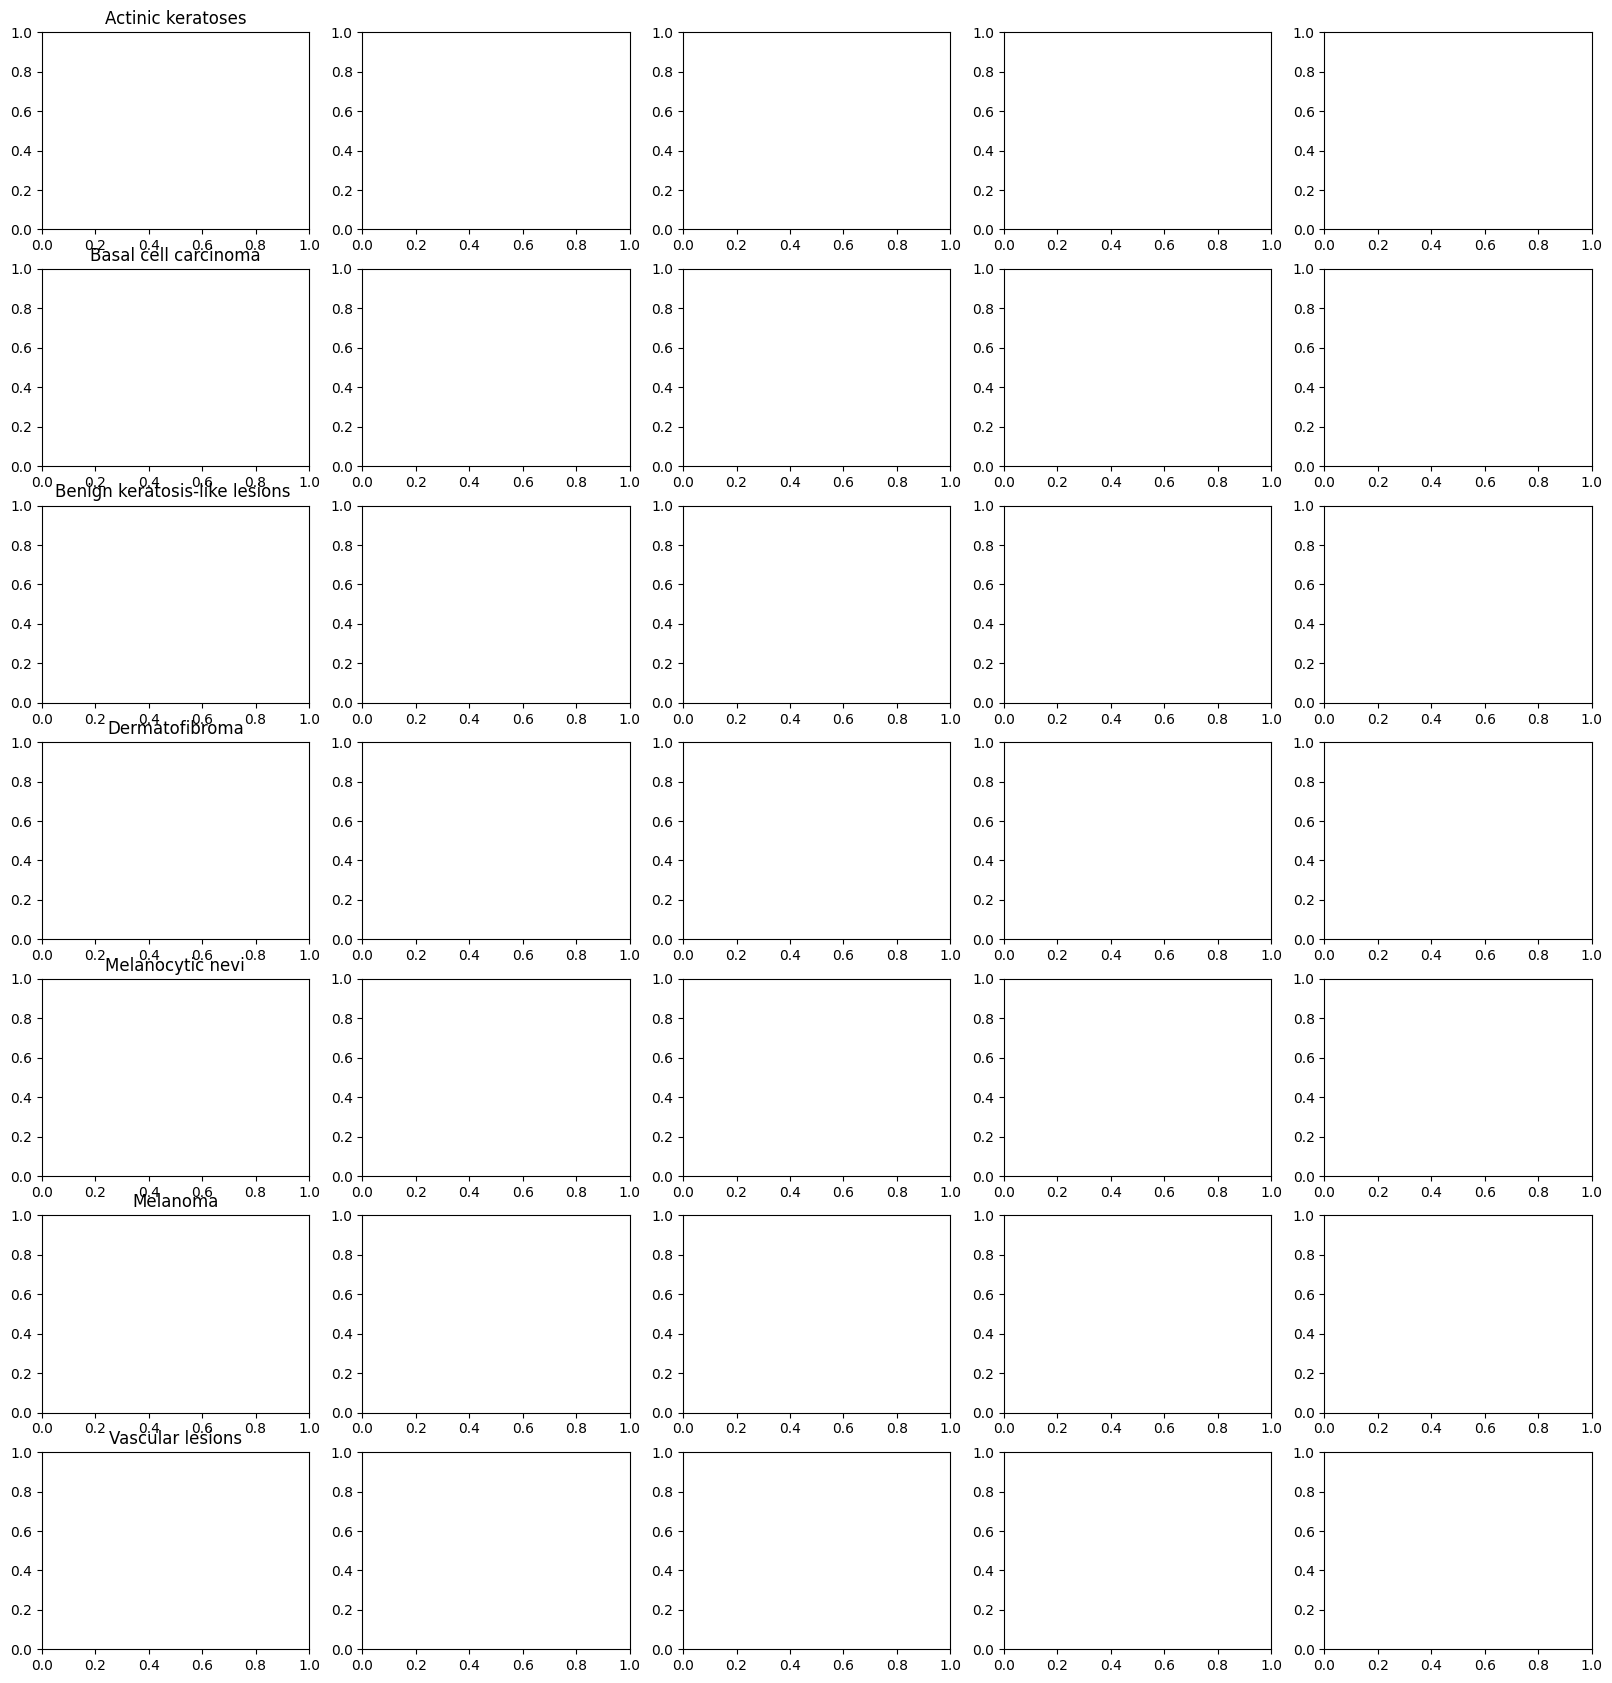

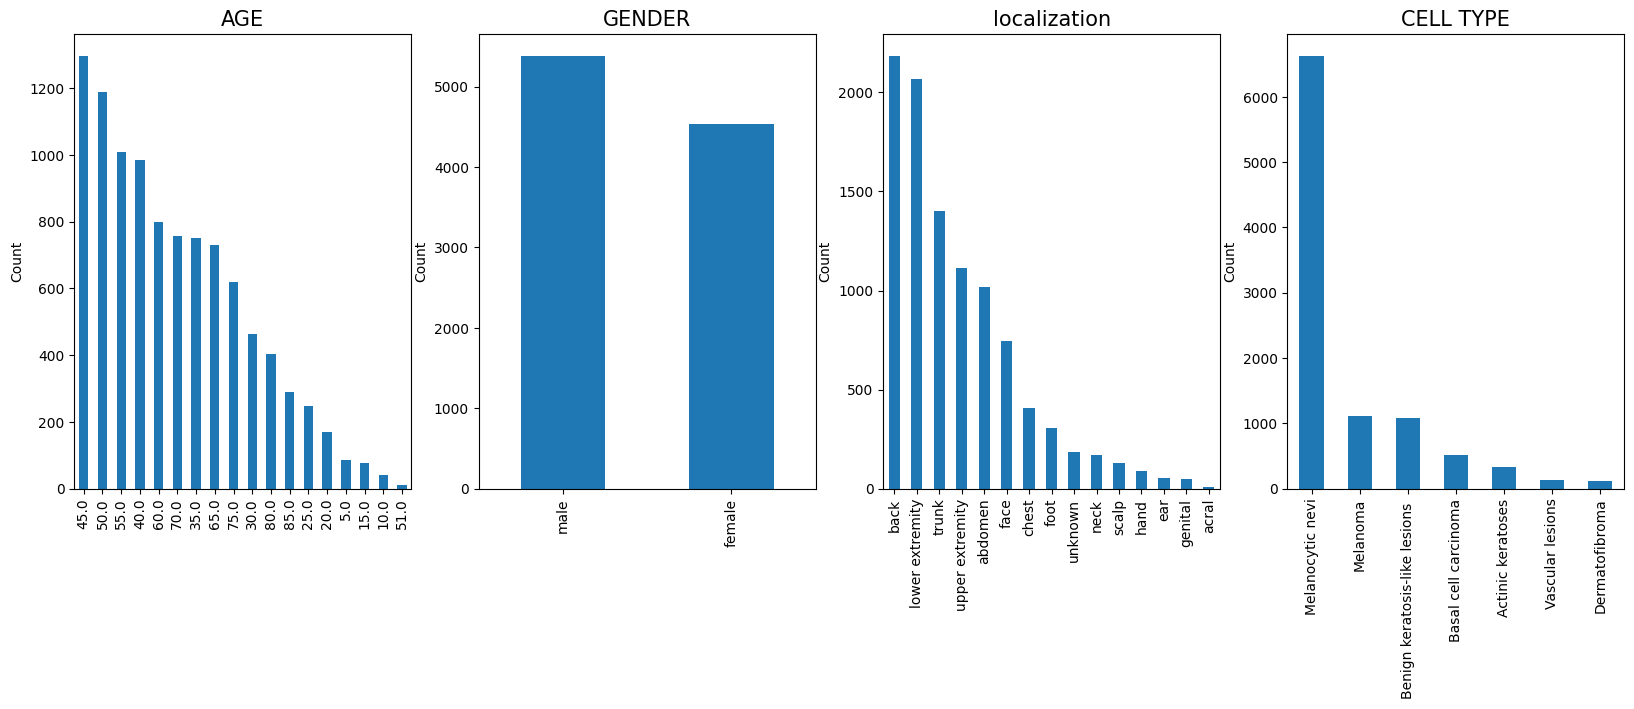

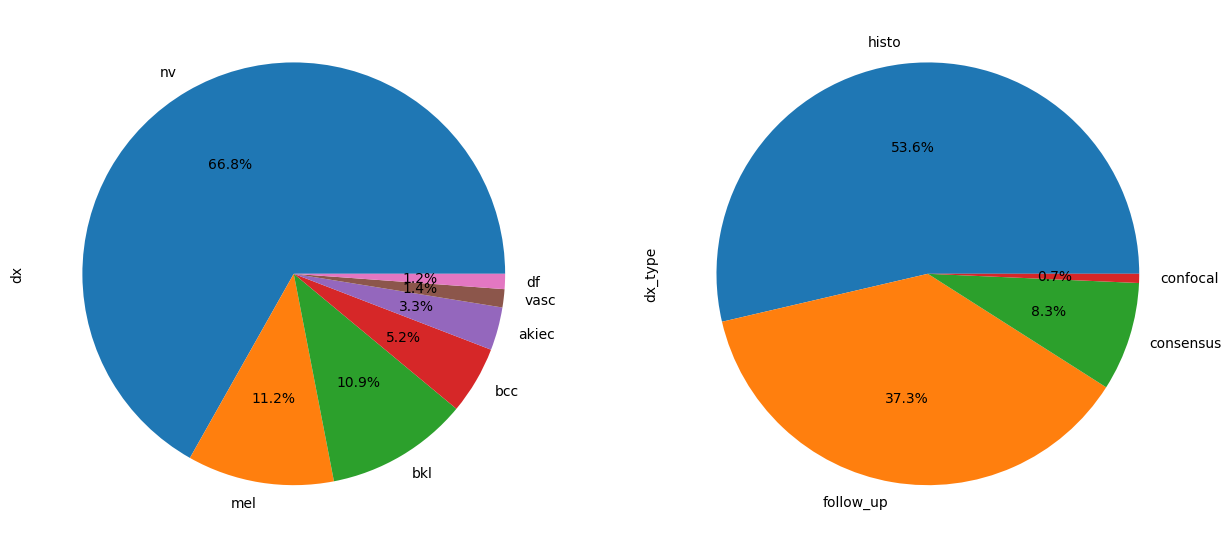

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_222 (Conv2D)         (None, 100, 125, 32)      896       
                                                                 
 conv2d_223 (Conv2D)         (None, 100, 125, 32)      9248      
                                                                 
 max_pooling2d_111 (MaxPool  (None, 50, 62, 32)        0         
 ing2D)                                                          
                                                                 
 dropout_148 (Dropout)       (None, 50, 62, 32)        0         
                                                                 
 conv2d_224 (Conv2D)         (None, 50, 62, 32)        9248      
                                                                 
 conv2d_225 (Conv2D)         (None, 50, 62, 32)        9248      
                                                     

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Number of samples: 8012


NameError: name 'confusion_mtx' is not defined

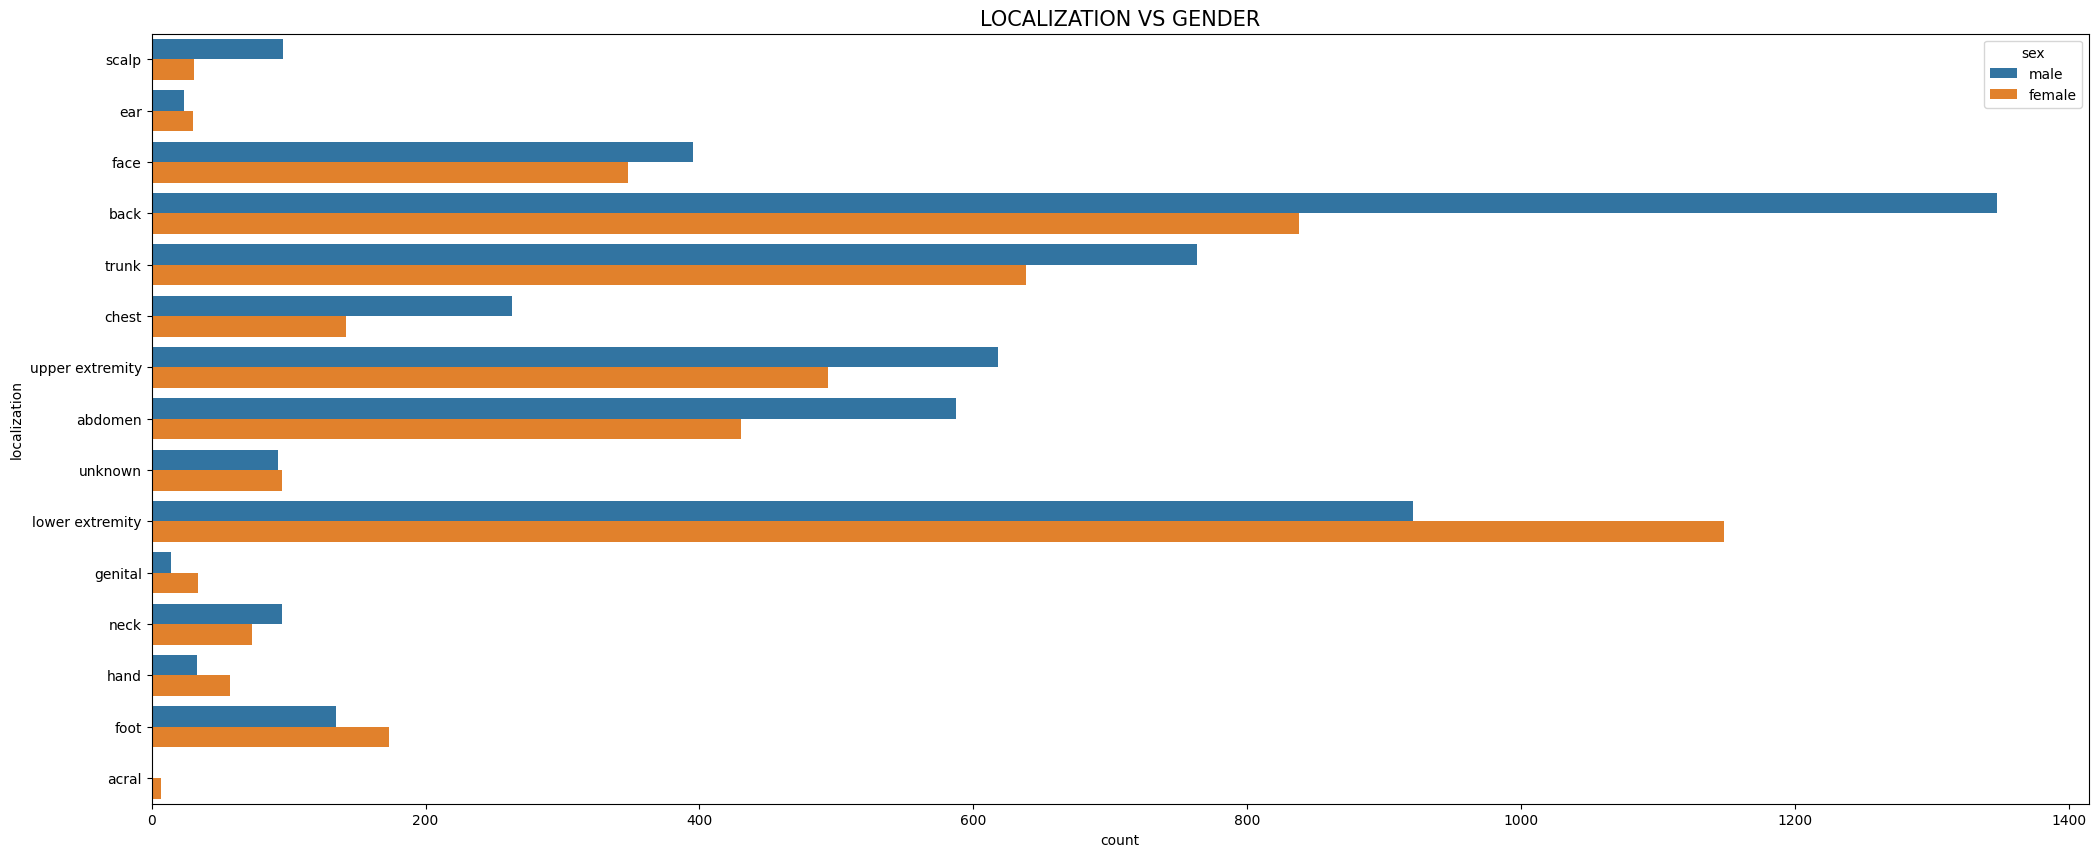

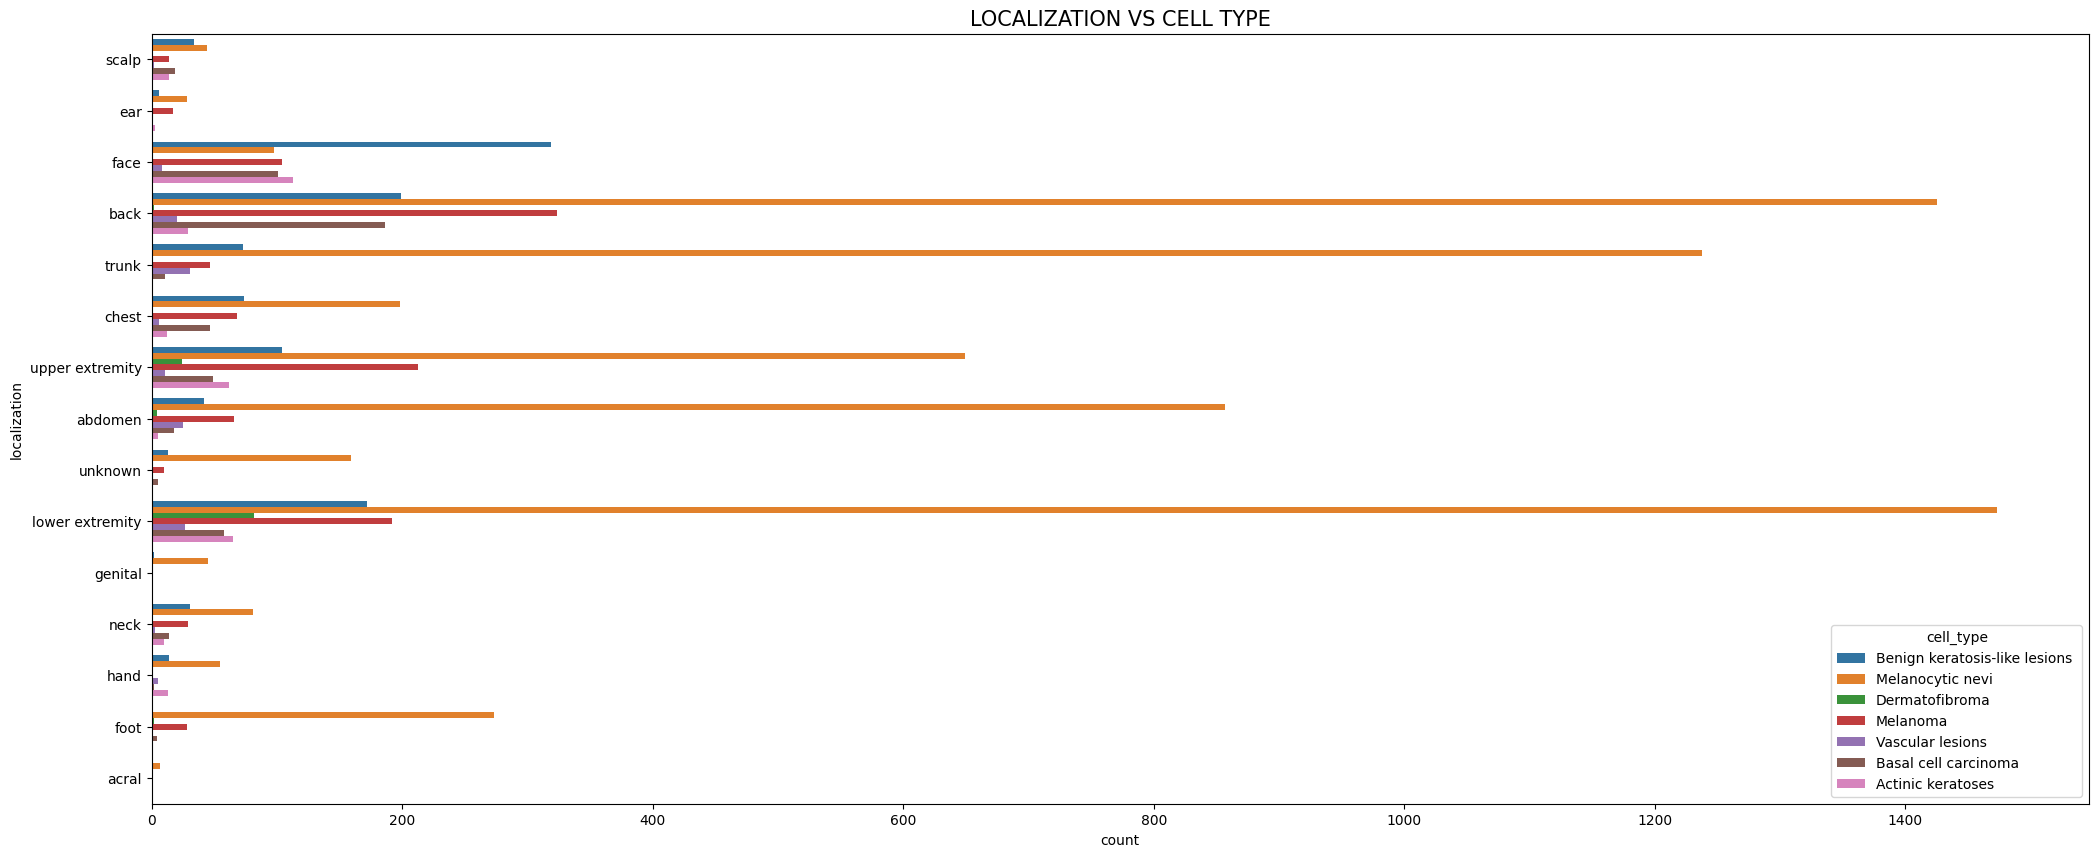

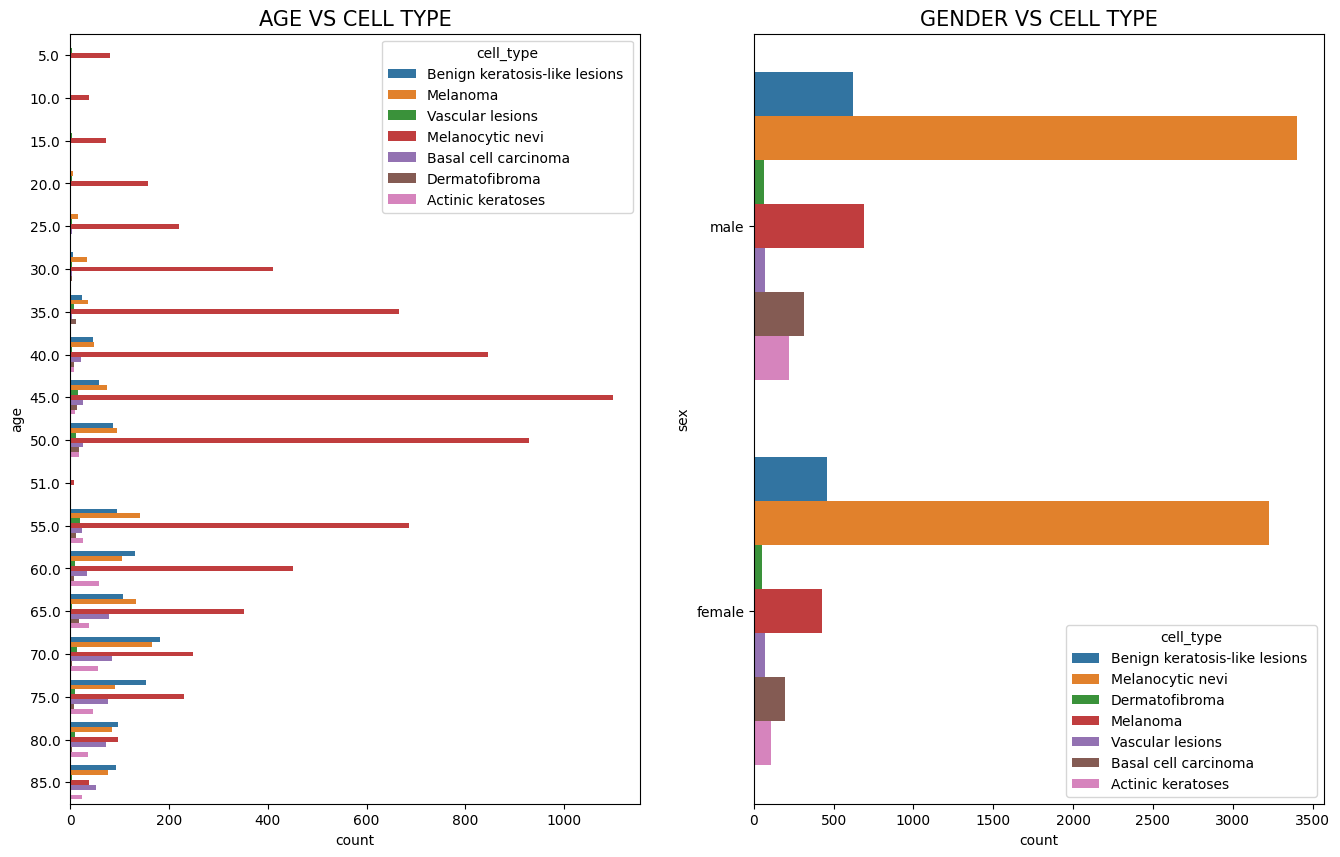

In [39]:
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np
import pandas as pd
import os
from tensorflow.keras.utils import to_categorical
from glob import glob
df = pd.read_csv('/content/HAM10000_metadata.csv')
df.head()
df.dtypes
df.describe()
df.isnull().sum()
df['age'].fillna(int(df['age'].mean()),inplace=True)
df.isnull().sum()
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
base_skin_dir = '../input/skin-cancer-mnist-ham10000'

# Merge images from both folders into one dictionary

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}
df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get)
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes
df.head()
import pandas as pd
import numpy as np
from PIL import Image

def load_and_resize_image(path):
    try:
        img = Image.open(path)
        resized_img = img.resize((125, 100))
        return np.asarray(resized_img)
    except Exception as e:
        print(f"Error processing image at path '{path}': {e}")
        return None

# Assuming df is your pandas DataFrame
df['image'] = df['path'].apply(load_and_resize_image)

import matplotlib.pyplot as plt

if not df.empty:
    n_samples = 5
    fig, m_axs = plt.subplots(7, n_samples, figsize=(4 * n_samples, 3 * 7))
    for n_axs, (type_name, type_rows) in zip(m_axs,
                                              df.sort_values(['cell_type']).groupby('cell_type')):
        n_axs[0].set_title(type_name)
        if not type_rows.empty:
            for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(min(n_samples, len(type_rows)), random_state=2018).iterrows()):
                if c_row['image'] is not None:
                    c_ax.imshow(c_row['image'])
                    c_ax.axis('off')
    fig.savefig('category_samples.png', dpi=300)
else:
    print("DataFrame is empty.")
import numpy as np

# Assuming df is your pandas DataFrame

# Filter out rows with None values in the 'image' column
df_filtered = df.dropna(subset=['image'])

# Compute the shape for each image
image_shapes = df_filtered['image'].map(lambda x: x.shape)

# Count occurrences of each shape
shape_counts = image_shapes.value_counts()

print(shape_counts)
df= df[df['age'] != 0]
df= df[df['sex'] != 'unknown']
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=0.2)
plt.subplot(2,4,1)
plt.title("AGE",fontsize=15)
plt.ylabel("Count")
df['age'].value_counts().plot.bar()

plt.subplot(2,4,2)
plt.title("GENDER",fontsize=15)
plt.ylabel("Count")
df['sex'].value_counts().plot.bar()
plt.subplot(2,4,3)
plt.title("localization",fontsize=15)
plt.ylabel("Count")
plt.xticks(rotation=45)
df['localization'].value_counts().plot.bar()

plt.subplot(2,4,4)
plt.title("CELL TYPE",fontsize=15)
plt.ylabel("Count")
df['cell_type'].value_counts().plot.bar()
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
df['dx'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(1,2,2)
df['dx_type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()
plt.figure(figsize=(25,10))
plt.title('LOCALIZATION VS GENDER',fontsize = 15)
sns.countplot(y='localization', hue='sex',data=df)
plt.figure(figsize=(25,10))
plt.title('LOCALIZATION VS CELL TYPE',fontsize = 15)
sns.countplot(y='localization', hue='cell_type',data=df)
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('AGE VS CELL TYPE',fontsize = 15)
sns.countplot(y='age', hue='cell_type',data=df)
plt.subplot(132)
plt.title('GENDER VS CELL TYPE',fontsize = 15)
sns.countplot(y='sex', hue='cell_type',data=df)
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
input_shape = (100, 125, 3)
num_classes = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.16))

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same'))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
from tensorflow.keras.optimizers import legacy

optimizer = legacy.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=4,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming x_train, y_train, x_test, and x_validate are defined properly elsewhere

# Splitting the dataset into training and validation sets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

train_df = pd.read_csv('/content/HAM10000_metadata.csv')
test_df = pd.read_csv('/content/HAM10000_metadata.csv')
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
train_df_encoded = train_df.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'object' else x)
test_df_encoded = test_df.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'object' else x)

# Convert to numpy array
train_data = np.array(train_df_encoded, dtype='float32')

test_data = np.array(test_df_encoded, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)


# Assuming x_train, x_validate are defined properly before reshaping
# Reshaping image data to have three dimensions (height = 100, width = 125, channels = 3)
num_samples = x_train.shape[0]
print("Number of samples:", num_samples)
X_train = np.reshape(x_train, (x_train.shape[0], -1, 1))


x_validate = x_validate.reshape(x_validate.shape[0], -1,1)

import itertools
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')












In [ ]:
from google.colab import drive
drive.mount('/content/drive')